In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_book = pd.read_csv("Books.csv")
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
df_book = df_book.drop(['Publisher','Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)


In [ ]:
df_book.head(3)


,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991


In [ ]:
ratings =pd.read_csv("Ratings.csv")
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


/tmp/ipython-input-1774682384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x="Book-Rating", palette="viridis")


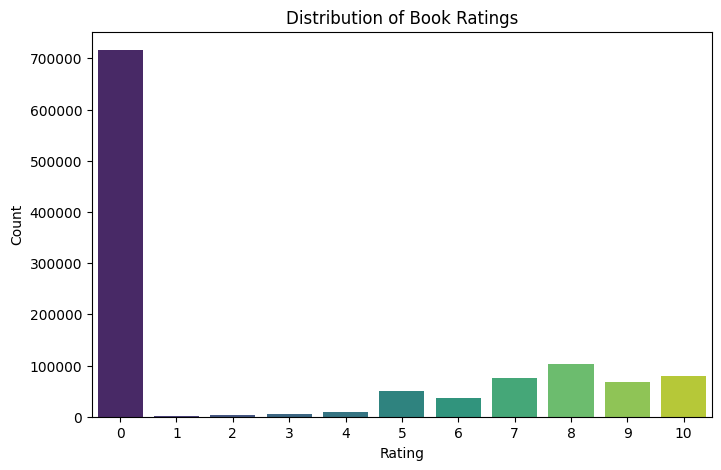

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=ratings, x="Book-Rating", palette="viridis")
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-2425911109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette="mako")


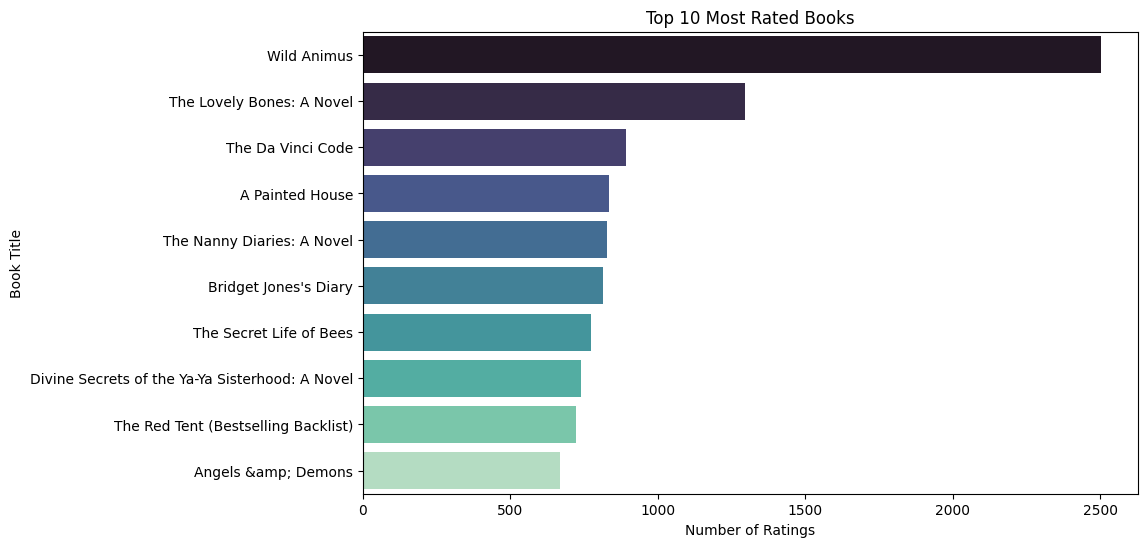

In [ ]:
top_books = (ratings.merge(df_book, on="ISBN")
             .groupby("Book-Title")["Book-Rating"]
             .count()
             .sort_values(ascending=False)
             .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_books.values, y=top_books.index, palette="mako")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()

/tmp/ipython-input-2064247758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="plasma")


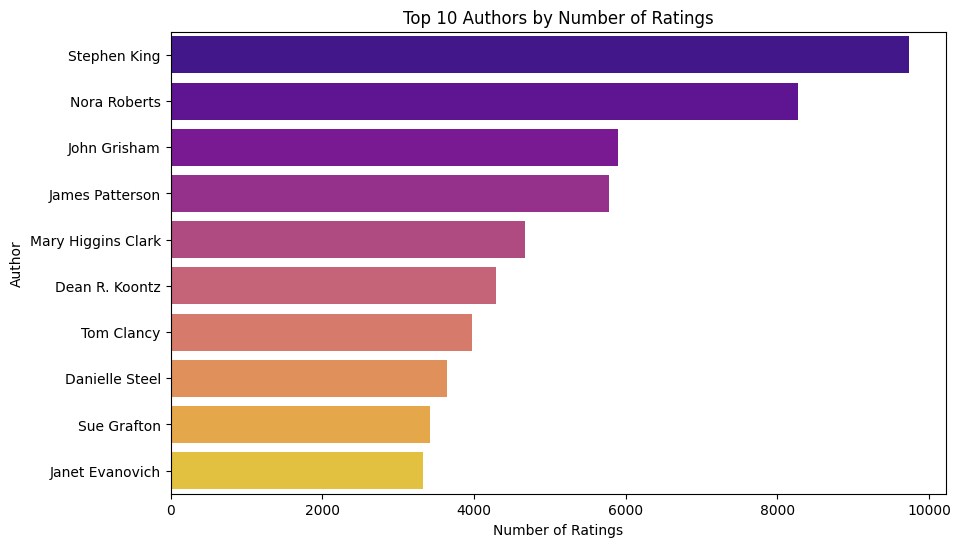

In [ ]:
top_authors = (ratings.merge(df_book, on="ISBN")
               .groupby("Book-Author")["Book-Rating"]
               .count()
               .sort_values(ascending=False)
               .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="plasma")
plt.title("Top 10 Authors by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Author")
plt.show()

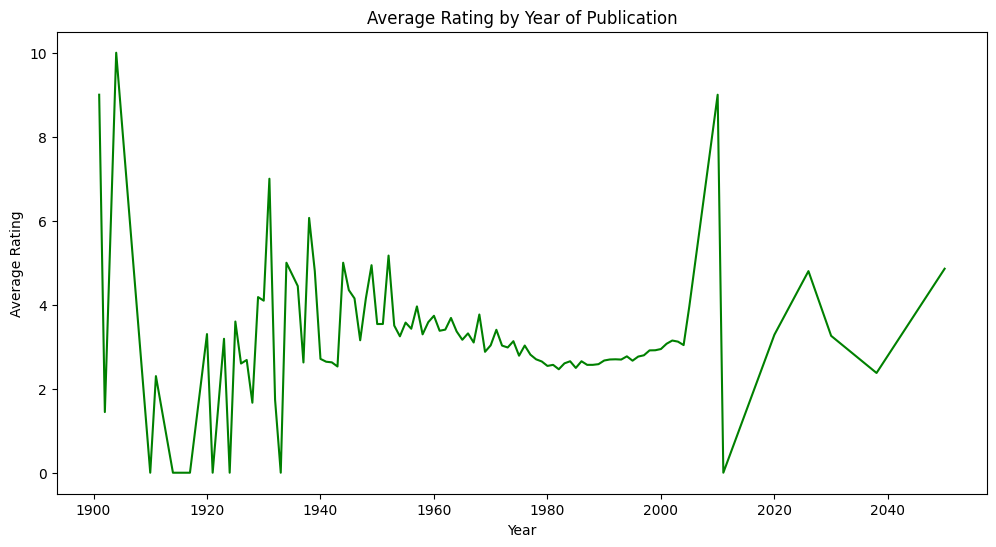

In [ ]:
avg_rating_year = (ratings.merge(df_book, on="ISBN")
                   .groupby("Year-Of-Publication")["Book-Rating"]
                   .mean()
                   .reset_index())

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rating_year, x="Year-Of-Publication", y="Book-Rating", color="green")
plt.title("Average Rating by Year of Publication")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


In [ ]:
df_book.isnull().sum()


,0
ISBN,0
Book-Title,0
Book-Author,1
Year-Of-Publication,0


In [ ]:
# Fill missing values
df_book['Book-Author'] = df_book['Book-Author'].fillna('Unknown Author')


# Clean year data
df_book['Year-Of-Publication'] = pd.to_numeric(df_book['Year-Of-Publication'], errors='coerce')
df_book = df_book.dropna(subset=['Year-Of-Publication'])
df_book = df_book[df_book['Year-Of-Publication'] > 1900]  # Remove unrealistic years

In [ ]:
df_book.isnull().sum()


,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0


**Colloborative Filtering -Based Recommendation System**


In [ ]:
merged_df = pd.merge(df_book,ratings,on='ISBN')
merged_df.head(3)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,11400,0


In [ ]:
combine_book_rating = merged_df.dropna(axis = 0, subset = ['Book-Title'])
book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Apple Magic (The Collector's series),1
2,Beyond IBM: Leadership Marketing and Finance ...,1
3,Dark Justice,1
4,Earth Prayers From around the World: 365 Pray...,10


In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating,totalRatingCount
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,2,0,2
1,0002005018,Clara Callan,Richard Bruce Wright,2001,8,5,14
2,0002005018,Clara Callan,Richard Bruce Wright,2001,11400,0,14
3,0002005018,Clara Callan,Richard Bruce Wright,2001,11676,8,14
4,0002005018,Clara Callan,Richard Bruce Wright,2001,41385,0,14


In [ ]:
popularity_threshold = 50
rating_popular_book= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,User-ID,Book-Rating,totalRatingCount
30,0399135782,The Kitchen God's Wife,Amy Tan,1991,8,0,310
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,11676,9,310
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,29526,9,310
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,36836,0,310
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,46398,9,310


In [ ]:
book_features_df=rating_popular_book.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)
book_features_df.head()

User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


book_features_df_matrix = csr_matrix(book_features_df.values)


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(book_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(book_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

2034


In [ ]:
book_features_df.head()


User-ID,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_name = "1984"
query_index = book_features_df.index.get_loc(book_name)

distances, indices = model_knn.kneighbors(
    book_features_df.iloc[query_index,:].values.reshape(1, -1),
    n_neighbors=6
)

print(f"Recommendations for '{book_name}':\n")
for i in range(1, len(distances.flatten())):
    print(f"{i}: {book_features_df.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]:.3f}")


Recommendations for '1984':

1: Animal Farm, with distance of 0.844
2: Brave New World, with distance of 0.874
3: American Psycho (Vintage Contemporaries), with distance of 0.909
4: Lord of the Flies, with distance of 0.913
5: Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death, with distance of 0.914
